# Cats versus Dogs classifier
We will work here on the cats_vs_dogs dataset that was used in a kaggle competition in 2016. It is composed of 10000 images of cats and 10000 images of dogs. We will build a more complex convolutionnal network this time in order to classify these pictures. However, we will be working only on 2000 pictures of cats and dogs (in the train set) and validating on 1000 images.

In this exemple we'll see:
- files and image manipulation
- how to build a convnet
- how to reduce overfitting on small dataset (with data augmentation, and Dropout layers)
- How to use the module ImageDataGenerator of keras
- How to use a pretrained convet and use it for our cause (VGG16 pretained network)
    - Using it for feature extraction
    - And for fine-tuning
## Load and preprocess the dataset
The data will be classified into different directories:
- Training, validation and testing directories
- Inside each of those, there will be a "cats" and "dogs" directory 

In [6]:
import os, shutil

In [7]:
original_dataset_dir = 'C:\\Users\\foucardguimax\\Desktop\\PYTHON\\Python3.7\\Machine-learnia\\Regression\\train' # Directory of the full dataset

In [8]:
base_dir = 'C:\\Users\\foucardguimax\\Desktop\\PortFolio\\keras\\cats_and_dogs_small'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('\n')
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total validation cat images:  500
total test cat images:  500


total training dog images:  1000
total validation dog images:  500
total test dog images:  500


We got: 2000 samples in the training set, 1000 in the validation set and 1000 in the test set. The training set is perfectly balanced between the two classes. This is a binary-classification problem.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_cat = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])
img = mpimg.imread(path_cat)
plt.imshow(img)

In [14]:
print(img.shape)

(149, 150, 3)


In [15]:
path_cat = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[10])
img = mpimg.imread(path_cat)
print(img.shape)

(374, 500, 3)


Apparently, all pictures have different size, we'll see how to address this problem later with keras modules.
# Building the network
## Import the relevant libraries

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),  activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Since we built a rather complicated network this time, let's look how the dimensions change.

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [40]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])
# Binary_CE because we end up with a binary classification

## Data preprocessing
Right now, pictures are JPEG files, however, we need to feed tensors into the network. Moreover, it is important to normalize these imput tensors. Here are the steps to follow:
- Read the picture files
- Decode the JPEG content to RGB grids of pixels
- Convert these into floatting-point tensors
- Rescale the pixels values

To do this, we will use the image-processing module of keras that allows us to automatically turn image files on disk into batches of preprocessed tensors.

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('label batch shape: ', labels_batch.shape)
    break

for data_batch_val, labels_batch_val in validation_generator:
    print('data batch shape: ', data_batch_val.shape)
    print('label batch shape: ', labels_batch_val.shape)
    break

data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)
data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


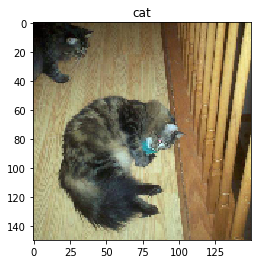

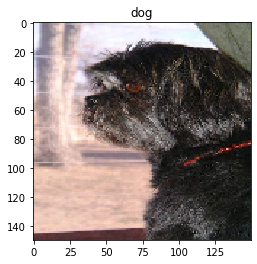

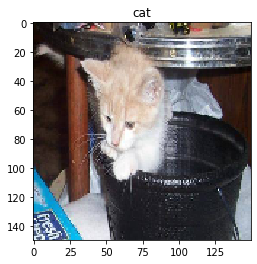

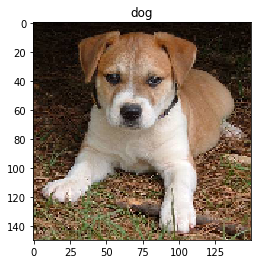

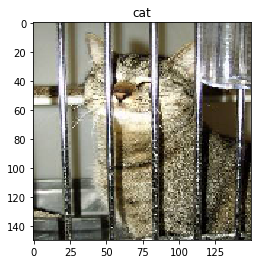

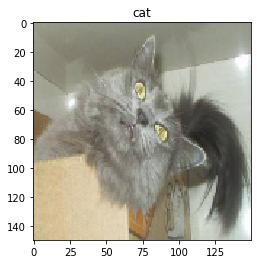

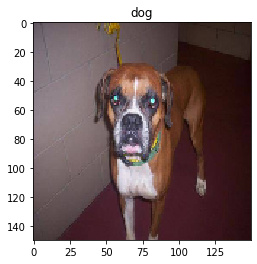

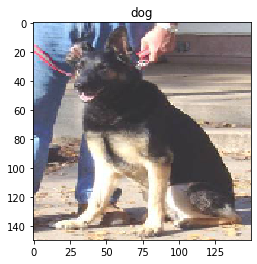

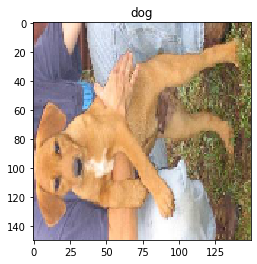

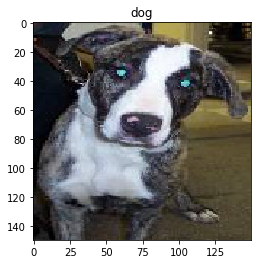

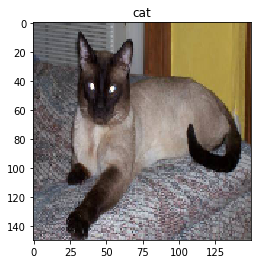

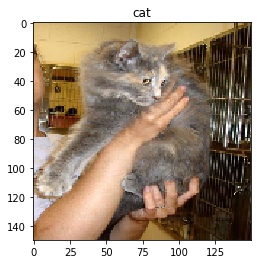

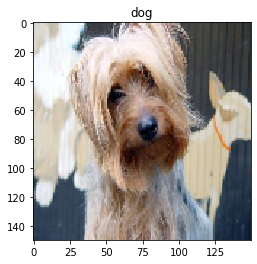

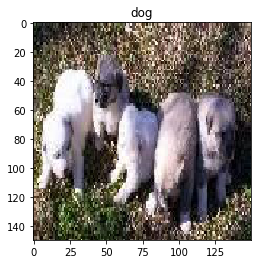

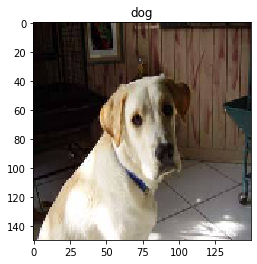

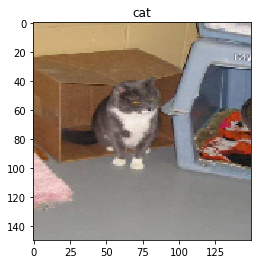

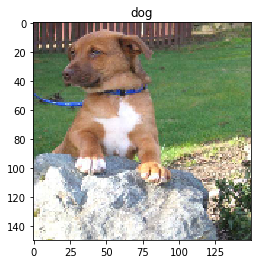

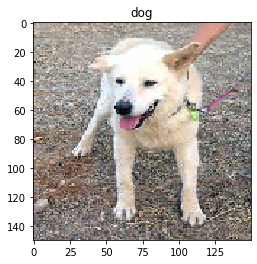

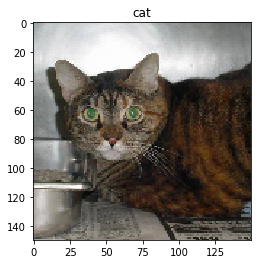

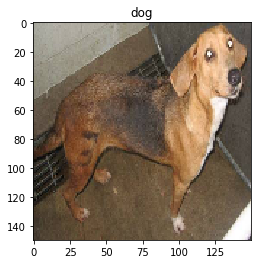

In [43]:
for i in range(data_batch.shape[0]):
    plt.figure()
    plt.imshow(data_batch[i])
    if labels_batch[i] == 0:
        plt.title('cat')
    else:
        plt.title('dog')

this is one batch of data that we can feed into the network. As it can be seen, images have been rescaled to 150x150 pixels images (hence the low quality of some images).
## Fitting the model using a batch generator

In [44]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data=validation_generator,
                             validation_steps = 50)

model.save('cats_and_dogs_small')

Epoch 1/30
100/100 [==============================] - 144s 1s/step - loss: 0.6939 - acc: 0.5250 - val_loss: 0.6765 - val_acc: 0.6330
Epoch 2/30
100/100 [==============================] - 147s 1s/step - loss: 0.6697 - acc: 0.5945 - val_loss: 0.6390 - val_acc: 0.7010
Epoch 3/30
100/100 [==============================] - 145s 1s/step - loss: 0.6329 - acc: 0.6470 - val_loss: 0.5982 - val_acc: 0.6950
Epoch 4/30
100/100 [==============================] - 143s 1s/step - loss: 0.5902 - acc: 0.6885 - val_loss: 0.5613 - val_acc: 0.7240
Epoch 5/30
100/100 [==============================] - 144s 1s/step - loss: 0.5486 - acc: 0.7235 - val_loss: 0.5520 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 144s 1s/step - loss: 0.5224 - acc: 0.7395 - val_loss: 0.5218 - val_acc: 0.7410
Epoch 7/30
100/100 [==============================] - 144s 1s/step - loss: 0.4880 - acc: 0.7660 - val_loss: 0.6050 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 143s 1s/step - 

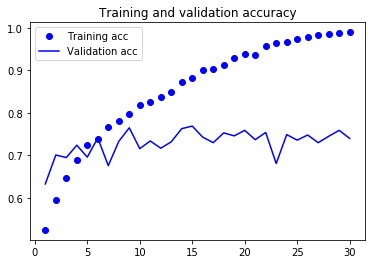

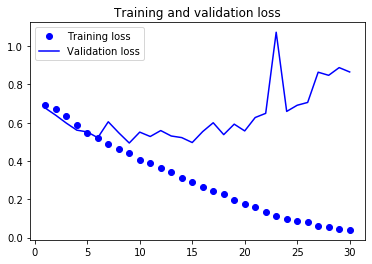

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The curves obtained show overfitting. The Accuracy quickly reaches around 72% while the accuracy loss keeps going up and up. Since we have here 2000 samples,overfitting is our number 1 concern. Here, to prevent it, we will use the *data augmentation* technique.
## Data augmentation
Since we have to few data, the model is unable to make gneralizaton to other data it never seen. With this technique, we are generating more training data via a number of random transformations, the aim is that at training time, the model will never see the exact same picture twice. Thnaks to the model *ImageGenerator* we will configure a certain number of transformation.
### Data augementation configuration via ImageDataGenerator

In [46]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40, #range in [0,180]°, that randomly rotate picture
                                                          width_shift_range = 0.2, #Fraction of the total width. moves randomly between this range
                                                          height_shift_range = 0.2,
                                                          shear_range = 0.2, #randomly applying shearing transformations
                                                          zoom_range = 0.2, # randomly zoom in pictures
                                                          horizontal_flip=True,
                                                          fill_mode='nearest') #Strategy used to fill newly created pixels

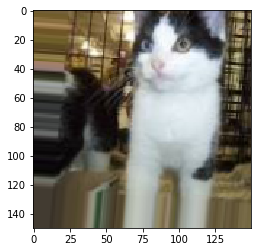

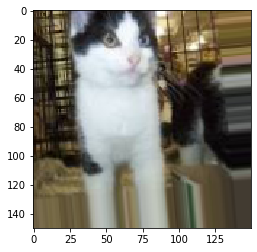

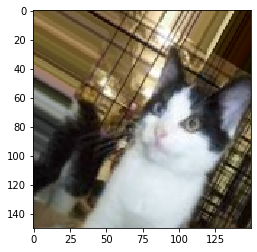

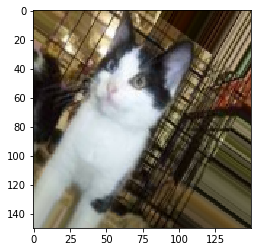

In [52]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[0] #Here we choose one particular image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150)) # Readind and reshaping the image

x = tf.keras.preprocessing.image.img_to_array(img) #Converting the image to numpy array
x = x.reshape((1,) +  x.shape) # Reshaping the image to a tensor (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i +=1
    if i % 4==0:
        break
plt.show()

Since all these pictures are still highly correlated, we will fight overfitting but not get rid of it. We are note creating new information, we are mixing it and using it each time differently. As a final step, we can cuse a dropout layer right before the densely connected classifier.
### Defining a new convnet

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),  activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [54]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                               rotation_range=40,
                                                              width_shift_range = 0.2,
                                                              height_shift_range = 0.2,
                                                              shear_range = 0.2,
                                                              zoom_range = 0.2,
                                                              horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0) #We are not augmenting the validation data

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 32,
                                                       class_mode='binary')

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 100,
                             validation_data=validation_generator,
                             validation_steps=50)

model.save('cats_and_dogs_small_augmented')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 233s 2s/step - loss: 0.6895 - acc: 0.5320 - val_loss: 0.6663 - val_acc: 0.6098
Epoch 2/100
100/100 [==============================] - 232s 2s/step - loss: 0.6721 - acc: 0.5808 - val_loss: 0.6592 - val_acc: 0.5964
Epoch 3/100
100/100 [==============================] - 229s 2s/step - loss: 0.6603 - acc: 0.5934 - val_loss: 0.6302 - val_acc: 0.6466
Epoch 4/100
100/100 [==============================] - 230s 2s/step - loss: 0.6500 - acc: 0.6178 - val_loss: 0.6280 - val_acc: 0.6225
Epoch 5/100
100/100 [==============================] - 228s 2s/step - loss: 0.6396 - acc: 0.6367 - val_loss: 0.6026 - val_acc: 0.6885
Epoch 6/100
100/100 [==============================] - 229s 2s/step - loss: 0.6330 - acc: 0.6394 - val_loss: 0.5867 - val_acc: 0.6897
Epoch 7/100
100/100 [==============================] - 227s 2s/step - loss: 0.6240 - acc: 0.6439 - val_loss: 0.5

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can notice from the previous graphs that thanks to the data augmentation and the dropout layer, we are no longer overfitting, even with 100 epochs ! The validation curves are closely tracking the training curves. We finally reach a point where the accuracy is almost 85%.
# Using a pretrained model
## Feature extraction with the VGG16
The feature extraction consists of using the representations learned by previous network to extract interesting features from new samples and use these new features as inputs of a new classifier which is trained from scratch. With this method, we will only use the *convolutionnal base* of the VGG16 network.

In [3]:
import tensorflow as tf

conv_base = tf.keras.applications.VGG16(weights='imagenet', #The weights checkpoint. Obtained with a dataset of millions of animals
                                       include_top = False, # Keeping only the convolutionnal base
                                       input_shape=(150,150,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

It looks like the previous model we've created but larger. We can see that it ends up with a (4,4,512) map at the end, we will build the dense network from this point.

there are now to ways we could proceed:
- Either running the convolutionnal base once with each image and use the data extracted as input to the dense layer.
- Or adding the dense layer to the top of the conv_base and beable to use data augmentation.

We'll do both to see the difference.

### Fast feature extraction without data augmentation
Let's start anew from the begining.

In [6]:
import os
import numpy as np

base_dir = 'C:\\Users\\foucardguimax\\Desktop\\PortFolio\\keras\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) #That's the end shape of the conv_base
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return(features, labels)

In [7]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# The extracted features are in shape (samples, 4,4,512). To feed them to a densely connected layer, one need to flatten them to a shape (samples, 4*4*512)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_dim = 4*4*512),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizers=tf.keras.optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics = ['acc'])

history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.7433 - acc: 0.7460 - val_loss: 0.2945 - val_acc: 0.8760
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.3331 - acc: 0.8585 - val_loss: 0.3443 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.2929 - acc: 0.8815 - val_loss: 0.3801 - val_acc: 0.8450
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2426 - acc: 0.9020 - val_loss: 0.3033 - val_acc: 0.8830
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 0.2126 - acc: 0.9070 - val_loss: 0.2679 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.2057 - acc: 0.9210 - val_loss: 0.3042 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 0.1756 - acc: 0.9285 - val_loss: 0.3186 - val_acc: 0.8880


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Adding a dense layer on the top of the convolutional base

In [10]:
model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before compiling this model, it is important to freeze the convolutional base of the model. If we don't then the weights would be changed and the aim of the VGG16 lost. Moreover, it will take a lot amount of time to train this model from scratch.

In [11]:
print('this is the number od trainable weights before freezing the conv_base: ' + str(len(model.trainable_weights)))

this is the number od trainable weights before freezing the conv_base: 30


In [12]:
conv_base.trainable=False
print('this is the number of trainable weights after freezing the conv base: ' + str(len(model.trainable_weights)))

this is the number of trainable weights after freezing the conv base: 4


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 2405s 24s/step - loss: 0.5974 - acc: 0.6900 - val_loss: 0.4585 - val_acc: 0.7930
Epoch 2/30
100/100 [==============================] - 2399s 24s/step - loss: 0.4805 - acc: 0.7955 - val_loss: 0.3675 - val_acc: 0.8500
Epoch 3/30
100/100 [==============================] - 2421s 24s/step - loss: 0.4302 - acc: 0.7990 - val_loss: 0.3356 - val_acc: 0.8610
Epoch 4/30
100/100 [==============================] - 2440s 24s/step - loss: 0.4000 - acc: 0.8190 - val_loss: 0.3130 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 2556s 26s/step - loss: 0.3758 - acc: 0.8330 - val_loss: 0.2953 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 2483s 25s/step - loss: 0.3712 - acc: 0.8275 - val_loss: 0.2870 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 2418s 24s/step - loss: 0.3588 - acc: 0.8305 - val_lo

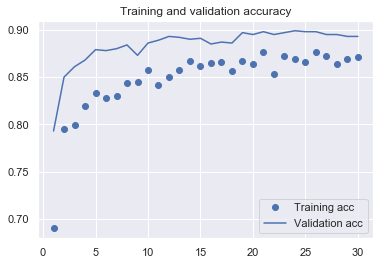

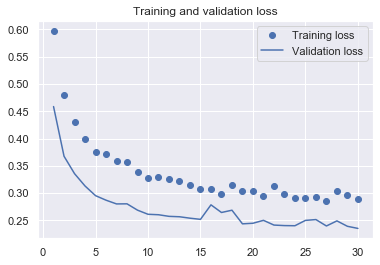

In [13]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                               rotation_range=40,
                                                              width_shift_range = 0.2,
                                                              height_shift_range = 0.2,
                                                              shear_range = 0.2,
                                                              zoom_range = 0.2,
                                                              horizontal_flip=True,
                                                               fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0) #We are not augmenting the validation data

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 20,
                                                       class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data=validation_generator,
                             validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see from these graph that we reached 90% accuracy this time, which is really nice since we only trained the model on 2000 images.
## Fine Tuning
With this technique, we will unfreeze few layers on the top of the pre-trained network and jointly train both these layers and the newly added ones. Here we will unfreeze the top 3 convolution2D layers and the last MaxPooling2D layer. However, we can train the top layers of the conv_base only once we've train the part we added, hence the following steps:
- Add the custom network on the top of the convolutional_base
- freeze the conv_base
- train the part we added
- unfreeze the top of the conv_base
- jointly train the top unfreeze and the custom part

We already made the 3 first steps while doing the feature extraction technique, we can catch up to the 4th.

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We have to unfreeze all layers up to the block4_pool.

In [15]:
conv_base.trainable=True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable=True
    if set_trainable:
        layer_trainable=True
    else:
        trainale_layer = False

Epoch 1/30
100/100 [==============================] - 2479s 25s/step - loss: 0.2677 - acc: 0.8850 - val_loss: 0.1486 - val_acc: 0.9410
Epoch 2/30
100/100 [==============================] - 2474s 25s/step - loss: 0.2087 - acc: 0.9100 - val_loss: 0.3175 - val_acc: 0.8970
Epoch 3/30
100/100 [==============================] - 2629s 26s/step - loss: 0.1736 - acc: 0.9245 - val_loss: 0.1158 - val_acc: 0.9560
Epoch 4/30
100/100 [==============================] - 2513s 25s/step - loss: 0.1359 - acc: 0.9480 - val_loss: 0.1130 - val_acc: 0.9560
Epoch 5/30
100/100 [==============================] - 2478s 25s/step - loss: 0.1177 - acc: 0.9550 - val_loss: 0.1026 - val_acc: 0.9650
Epoch 6/30
100/100 [==============================] - 2469s 25s/step - loss: 0.0944 - acc: 0.9560 - val_loss: 0.1022 - val_acc: 0.9700
Epoch 7/30
100/100 [==============================] - 2472s 25s/step - loss: 0.0942 - acc: 0.9580 - val_loss: 0.1456 - val_acc: 0.9550
Epoch 8/30
100/100 [==============================] - 2

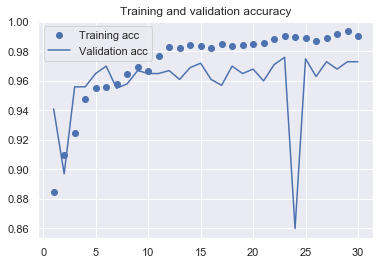

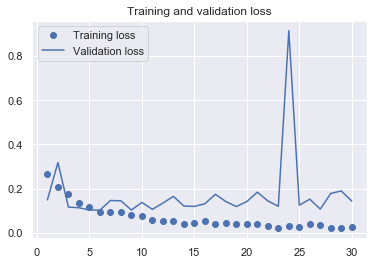

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
             metrics = ['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Since these graphs are noisy, let's smothen them

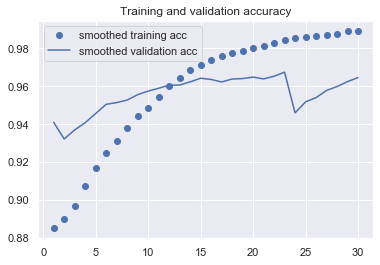

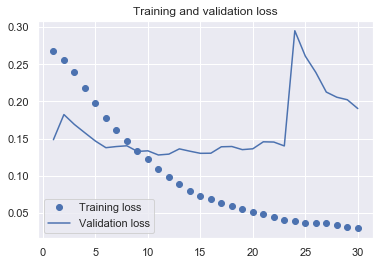

In [18]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return(smoothed_points)

plt.plot(epochs, smooth_curve(acc), 'bo', label='smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now that we've went that far, we can finally evaluate our model on the test data:

In [20]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc: ', test_acc)

Found 1000 images belonging to 2 classes.
test acc:  0.961


At the end of the day, we reach an accuracy of 96% which is a very high score regarding the few amount of data we used. We could have reached a better accuracy by feeding more data into the models or by training it longer. However, this is not possible to do so with my laptop, hence the current results.